***
***
***
<br><font size = 13><center><u>Unsupervised Analysis Project</u></center></font><br>
    
<strong><h2>Team 2 </h2></strong> <br>
Daniil Kolodkin <br>
Shuxin Li <br>
Harish Mallavarapu <br>
Sarah McCahill <br>
Pablo Domingo Quiroz Rios<br>

***

# Introduction

## Context
Today’s computer shopper has a choice of two great software platform standards from the greatest tech rivals, Apple, and Microsoft. As a result, the two firms have been rigorously researching several aspects of consumer buying behavior to determine if consumers prefer to buy a Windows or a Mac. Therefore, Apple has commissioned Team 2 to run an analysis from the perspective of the Big Five personality traits(OCEAN) and Hult DNA to further understand what makes a consumer buy their products and who is buying their products.

## Analysis
In this analysis we will explore primary data gathered from a survey where several hundred consumers have answered 78 questions. We recognize the disadvantages that come with surveys such as dishonest answers or loss of interest. However, from the 78 questions we will separate them into their Big Five personality traits and Hult DNA, which are both representative of psychographic characteristics. We will also dive into some demographics to derive key insights about the consumer.  

Following our data exploration, we organize and perform unsupervised machine learning techniques to determine the types of consumers that are likely to purchase a Mac or Windows computer. Our goal is to help Apple determine unique customers that are more inclined to remain due to brand loyalty or switch from their current laptop because of other underlying reasons. 


# Preparation and Exploration

In [1]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from sklearn.manifold        import TSNE
from sklearn.preprocessing   import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster         import KMeans


########################################
# loading data and setting display options
########################################

file = "survey_data.xlsx"

survey = pd.read_excel(io = file)

survey.head(n=5)


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

survey.head(n=5)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,10000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,10001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,10002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,10003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,10004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian


# Cleaning the Data 

In [2]:
# creating list for column names
col_names = ['surveyID', '1', '2', '3', '4', '5', '6', ' 7', ' 8', ' 9', '10', '11', '12', '13',
             '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
             '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
             '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
             '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
             '66', '67', '68', '69', '70', '71', 'current_laptop', 'next_laptop',
             'program', 'age', 'gender', 'nationality', 'ethnicity']

In [3]:
# # renaming the columns
# survey.columns = col_names

# # # checking the data
# # survey

In [4]:
# renaming the columns
survey.columns = col_names

# lower casing all values in nationality coulmn
survey['nationality'] = survey['nationality'].str.lower()

# checking the data
survey.head(n=5)

,surveyID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,current_laptop,next_laptop,program,age,gender,nationality,ethnicity
0,10000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,10001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,ecuador,Hispanic / Latino
2,10002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,indian,West Asian / Indian
3,10003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,10004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,china,Far east Asian


# Creating a Function to Reverse Values

The Big5 is a spectrum by which the five parameters a personality is measured. People can have traces of all of them, but may be higher or lower depending on the personality. For example, someone who tends to insult others would be considered low agreeableness. Therefore we took the lows into consideration by the following code.

In [5]:
# Creating a function to reverse values

# Certain columns on Agreeableness are on "Reverse"
# e.g. People who insult should have low Agreeableness instead of 
# a high one according to the big five

def reverse(col1, col2):
    
    one   = [1] 
    two   = [2]       
    three = [3]       
    four  = [4]       
    five  = [5]  
    
    survey.loc[col1.isin(one), [col2]]    = 5
    survey.loc[col1.isin(two), [col2]]    = 4
    survey.loc[col1.isin(three), [col2]]  = 3
    survey.loc[col1.isin(four), [col2]]   = 2
    survey.loc[col1.isin(five), [col2]]   = 1


In [6]:
# making value negative for the columns that have reverse scoring
survey['rev_2'] = 0
survey['rev_4'] = 0
survey['rev_6'] = 0
survey['rev_10'] = 0
survey['rev_12'] = 0
survey['rev_14'] = 0
survey['rev_16'] = 0
survey['rev_18'] = 0
survey['rev_20'] = 0
survey['rev_22'] = 0
survey['rev_24'] = 0
survey['rev_26'] = 0
survey['rev_28'] = 0
survey['rev_29'] = 0
survey['rev_30'] = 0
survey['rev_32'] = 0
survey['rev_34'] = 0
survey['rev_36'] = 0
survey['rev_38'] = 0
survey['rev_39'] = 0
survey['rev_44'] = 0
survey['rev_46'] = 0
survey['rev_49'] = 0
survey['rev_52'] = 0
survey['rev_62'] = 0
survey['rev_66'] = 0


reverse(survey['2'], 'rev_2')
reverse(survey['4'], 'rev_4')
reverse(survey['6'], 'rev_6')
reverse(survey['10'], 'rev_10')
reverse(survey['12'], 'rev_12')
reverse(survey['14'], 'rev_14')
reverse(survey['16'], 'rev_16')
reverse(survey['18'], 'rev_18')
reverse(survey['24'], 'rev_24')
reverse(survey['26'], 'rev_26')
reverse(survey['28'], 'rev_28')
reverse(survey['29'], 'rev_29')
reverse(survey['30'], 'rev_30')
reverse(survey['32'], 'rev_32')
reverse(survey['34'], 'rev_34')
reverse(survey['36'], 'rev_36')
reverse(survey['38'], 'rev_38')
reverse(survey['39'], 'rev_39')
reverse(survey['44'], 'rev_44')
reverse(survey['46'], 'rev_46')
reverse(survey['49'], 'rev_49')
reverse(survey['52'], 'rev_52')
reverse(survey['62'], 'rev_62')
reverse(survey['66'], 'rev_66')

In [7]:
survey['rev_36'].value_counts()

4    38
3    36
2    34
1    23
5     6
Name: rev_36, dtype: int64

In [8]:
# making a copy of dataframe
survey_copy = survey.copy()

# Addressing Duplicate Questions

In [9]:
# Looping to check if someone had different answers for duplicated question: 
list_1 = []
list_2 = []
list_3 = []

for index in survey.iterrows():
    list_1 = abs(survey.iloc[:,55] - survey.iloc[:,58])
    survey['list_1'] = list_1
    list_2 = abs(survey.iloc[:,56] - survey.iloc[:,59])
    survey['list_2'] = list_2
    list_3 = abs(survey.iloc[:,57] - survey.iloc[:,60])
    survey['list_3'] = list_3

survey_test_1 = survey[survey['list_1']>2]
survey_test_2 = survey[survey['list_2']>2]
survey_test_3 = survey[survey['list_3']>2]

In [10]:
# Taking the mean observations of repeated columns: 
survey['58_new']= np.absolute((survey['58'] + survey['55'])/2)

# dropping the original columns that are substituted by the new column
survey = survey.drop(['58', '55'], axis=1)

# Creating Categorical Variable for Age

/Users/mof/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


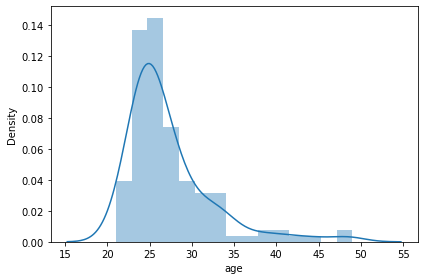

In [11]:
# Histogram: 
sns.distplot(a = survey['age'],
                 hist = True,
                 kde = True)
    
plt.tight_layout()
plt.show()

In [12]:
# Dividing age in categories: 
# Creating loop to define categories according to ratings
age_lst = []

for row,col in survey.iterrows():
    if survey.loc[row,'age'] < 25:
        age_lst.append('< 25')
    elif survey.loc[row,'age'] < 30:
        age_lst.append('25-30')
    else:
        age_lst.append('>=30')

# Adding new variable to dataset
survey['age_category'] = pd.Series(age_lst)

In [13]:
# Checking dataset with new categorical variable: 
survey.head(n=5)

print(f"""
Age Group
------
{survey['age_category'].value_counts().sort_index()}

""")


Age Group
------
25-30    65
< 25     45
>=30     27
Name: age_category, dtype: int64




In [14]:
# separating the categorical data
survey_cate = survey.loc[:, ['surveyID', 'current_laptop', 'next_laptop', 'program', 'age', 
                             'gender', 'nationality', 'ethnicity','age_category']]
survey_cate.head(n = 5)

,surveyID,current_laptop,next_laptop,program,age,gender,nationality,ethnicity,age_category
0,10000,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,25-30
1,10001,Windows laptop,Windows laptop,One year Business Analytics,27,Male,ecuador,Hispanic / Latino,25-30
2,10002,Windows laptop,Windows laptop,One year Business Analytics,25,Male,indian,West Asian / Indian,25-30
3,10003,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,25-30
4,10004,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,china,Far east Asian,25-30


In [15]:
# Creating a copy of the original data before merging variables: 
survey_original = survey

# Creating New Variables with Big Five Personality and Hult DNA

In [16]:
# Creating new variables: 
survey['Agreeableness'] = survey.loc[:,['rev_12', 'rev_16', '17', '22','rev_26', '27', 'rev_32', '37', '42', '47']].mean(axis=1)
survey['Communicating'] = survey.loc[:,['57', '60', '61', 'rev_62', '63', '64', '65']].mean(axis=1)
survey['Conscientousness'] = survey.loc[:,['3','13', 'rev_18', '23', 'rev_28', '33', 'rev_38', '43', '45', '48']].mean(axis=1)

survey['Extraversion'] = survey.loc[:,['1', ' 7', '11', '21', '31', 'rev_36', '41', 'rev_46', '65']].mean(axis=1)

survey['Neuroticism'] = survey.loc[:,['rev_2', 'rev_4', 'rev_6', ' 8', ' 9', 'rev_14', '19', 'rev_24', 'rev_29', 'rev_34', 'rev_39', 'rev_44', 'rev_49']].mean(axis=1)
survey['Openness'] = survey.loc[:,['5', 'rev_10', '15', '20', '25', 'rev_30', '35', '40', '50', '54', '57', '60', '64', '69']].mean(axis=1)
survey['Team building'] = survey.loc[:,['rev_66', '67', '68', '69', '70', '71']].mean(axis=1)
survey['Thinking'] = survey.loc[:,['51', 'rev_52', '53', '54', '56', '58_new', '59']].mean(axis=1)


In [17]:
# separating the ocean data
survey_ocean = survey.loc[:, ['Openness', 'Conscientousness', 'Extraversion', 'Agreeableness', 'Neuroticism']]
survey_ocean.head(n = 5)


,Openness,Conscientousness,Extraversion,Agreeableness,Neuroticism
0,3.642857,4.2,3.222222,3.5,3.076923
1,4.000000,4.1,2.222222,4.0,2.923077
2,3.500000,3.7,3.333333,3.1,3.846154
3,4.071429,3.4,3.555556,3.7,2.846154
4,3.428571,3.2,3.333333,3.1,2.692308


In [18]:
# separating the Hult DNA data
survey_hult = survey.loc[:, ['Communicating', 'Team building', 'Thinking']]
survey_hult.head(n = 5)

,Communicating,Team building,Thinking
0,3.857143,4.000000,4.000000
1,4.142857,4.333333,3.928571
2,3.428571,3.500000,3.428571
3,4.428571,4.000000,3.928571
4,3.285714,2.833333,3.285714


# Getting a Scree Plot & Inertia_plot 

In [19]:
# Creating scree_plot function: 
def scree_plot(pca_object, export = False):

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)

    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')

    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
        
    # displaying the plot
    plt.show()
    
    
    
# inertia plot
def inertia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

# Clustering

<h3> Preparing Big Five Personality Traits Data </h3>

According to Open psychometrics, all the questions answered on the survey are the ones that are asked in the Big Five Personality Traits Test. These questions are grouped into 5 main subgroups that are:

1.Openness : A person with a high level of openness to experience in a personality test enjoys trying new things. They are imaginative, curious, and open-minded. 



2.Conscientiousness : A person scoring high in conscientiousness usually has a high level of self-discipline. These individuals prefer to follow a plan, rather than act spontaneously.
    


3.Extroversion : A person who scores high in extroversion on a personality test is the life of the party. They enjoy being with people, participating in social gatherings, and are full of energy. 

4.Agreeableness :People with high agreeableness generally have an optimistic view of human nature and get along well with others. 


5.Neuroticism :   People who score high in emotional stability on a career test react less emotionally and are less easily upset. They tend to be emotionally stable, calm, and do not constantly experience negative feelings. 
    



In [20]:
############# Scalling for OCEAN ################

# Scaling dataset: 

# Instantiating:
scaler = StandardScaler()

# Fitting:
scaler.fit(survey_ocean)

# Transforming:
X_ocean_scaled = scaler.transform(survey_ocean)

# Converting into a DataFrame:
survey_ocean_scaled = pd.DataFrame(X_ocean_scaled)

# reattaching column names
survey_ocean_scaled.columns = survey_ocean.columns


# checking pre- and post-scaling variance
print(pd.np.var(survey_ocean), '\n\n')
print(pd.np.var(survey_ocean_scaled))

Openness            0.154692
Conscientousness    0.266248
Extraversion        0.394554
Agreeableness       0.164572
Neuroticism         0.307045
dtype: float64 


Openness            1.0
Conscientousness    1.0
Extraversion        1.0
Agreeableness       1.0
Neuroticism         1.0
dtype: float64


<ipython-input-20-26054a3c8315>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_ocean), '\n\n')
<ipython-input-20-26054a3c8315>:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_ocean_scaled))


Looking at the results of the Standard Scaler, we ran correlations to see which categories relate to what.

In [21]:
# correlation for ocean:
survey_ocean_corr = survey_ocean_scaled.corr().round(2)
survey_ocean_corr

,Openness,Conscientousness,Extraversion,Agreeableness,Neuroticism
Openness,1.00,0.43,0.32,0.47,0.09
Conscientousness,0.43,1.00,0.06,0.40,0.22
Extraversion,0.32,0.06,1.00,0.40,0.18
Agreeableness,0.47,0.40,0.40,1.00,0.20
Neuroticism,0.09,0.22,0.18,0.20,1.00


<h3> Building Big Five Personality Traits PCA </h3>

The original shape and PCA shape are printed to verify whether we are in the right direction or not.

With the graph shown, it is noticeable how the PCA1 is explaining more than 40% of the entire dataset. After the first PCA it can be observed how the explanation percentage significantly reduces, creating the "elbow" shape of the graph.

Original shape: (137, 5)
PCA shape     : (137, 5)


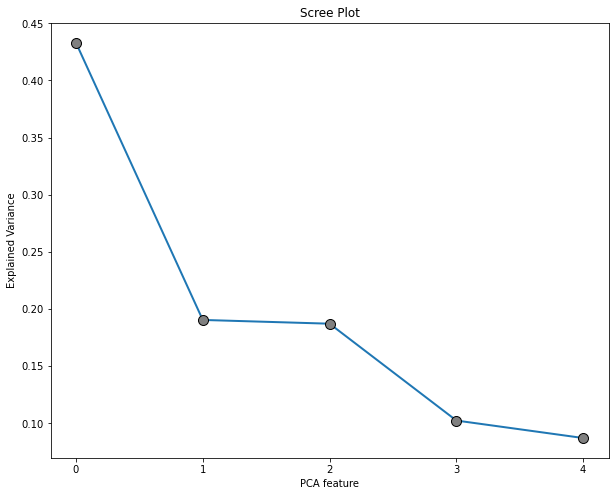

In [22]:
# Instantiating a PCA object:
ocean_pca = PCA(n_components = None,
                   random_state = 802)

# Fitting and transforming:
survey_ocean_pca = ocean_pca.fit_transform(X_ocean_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", X_ocean_scaled.shape)
print("PCA shape     :",  survey_ocean_pca.shape)

# calling the scree_plot function
scree_plot(pca_object = ocean_pca)

<h3> Evaluating OCEAN PCA Algorithms </h3>

We look at the different PCA variances

In [23]:
# Evaluating OCEAN PCA Algorithms
# component number counter
component_number = 0

# looping over each principal component
for variance in ocean_pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.433
PC 2 : 0.19
PC 3 : 0.187
PC 4 : 0.102
PC 5 : 0.087


<h3> Building Big Five Personality Traits PCA </h3>

Building the new ocean PCA for the first three components seen from the above results.

In this new section we decided to just keep the PCAs that were above 0.20, therefore our new PCA analysis will be limited to 3 components.

Original shape: (137, 5)
PCA shape     : (137, 3)


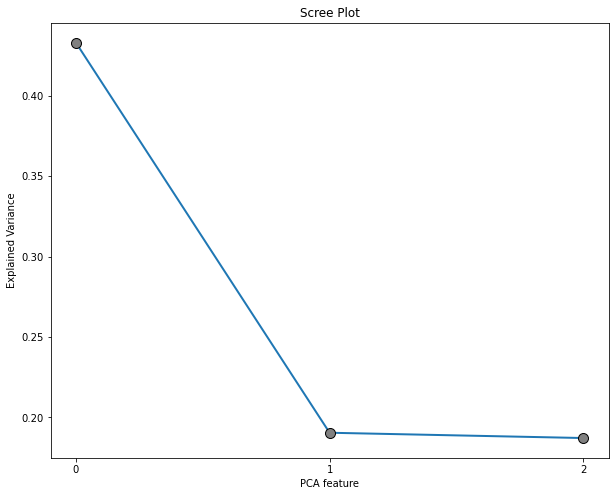

In [24]:
# Building OCEAN PCA: 
# Instantiating a PCA object:
new_ocean_pca = PCA(n_components = 3,
                   random_state = 802)

# Fitting and transforming:
survey_newocean_pca = new_ocean_pca.fit_transform(X_ocean_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", X_ocean_scaled.shape)
print("PCA shape     :",  survey_newocean_pca.shape)

# calling the scree_plot function
scree_plot(pca_object = new_ocean_pca)

<h3> Evaluating Big Five Personality Traits PCA Algorithms </h3>

Showing the first three PCA variances 

In [25]:
# Evaluating OCEAN PCA Algorithms
# component number counter
component_number = 0

# looping over each principal component
for variance in new_ocean_pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.433
PC 2 : 0.19
PC 3 : 0.187


<h3> Classifying Components </h3>

The PCA represents the personality characteristics of Big5 and Hult DNA that are present and absent in a human. We will offer names based on the characters to give a simple understanding of the people.And to verify how the components function against the identified personalities and characteristics.

In [26]:
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(ocean_pca.components_))

# naming rows as original features
factor_loadings = factor_loadings.set_index(survey_ocean_scaled.columns)

# transposing pca components (pc = 3)
factor_loadings_new = pd.DataFrame(pd.np.transpose(new_ocean_pca.components_))

# naming rows as original features
factor_loadings_new= factor_loadings_new.set_index(survey_ocean_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}

3 Components Factor Loadings
------------------------------
{factor_loadings_new.round(2)}
""")

# checking the result
factor_loadings_new

# analyzing factor strengths per customer
X_pca_reduced = new_ocean_pca.transform(survey_ocean_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# checking the results
X_pca_df

pd.np.var(X_pca_df)


MAX Components Factor Loadings
------------------------------
                     0     1     2     3     4
Openness         -0.51  0.09  0.37  0.67  0.37
Conscientousness -0.45  0.64  0.03 -0.11 -0.61
Extraversion     -0.39 -0.76 -0.02  0.09 -0.51
Agreeableness    -0.55 -0.09  0.11 -0.70  0.43
Neuroticism      -0.28  0.06 -0.92  0.18  0.19

3 Components Factor Loadings
------------------------------
                     0     1     2
Openness         -0.51  0.09  0.37
Conscientousness -0.45  0.64  0.03
Extraversion     -0.39 -0.76 -0.02
Agreeableness    -0.55 -0.09  0.11
Neuroticism      -0.28  0.06 -0.92



<ipython-input-26-fad4d9cc79ea>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(ocean_pca.components_))
<ipython-input-26-fad4d9cc79ea>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_new = pd.DataFrame(pd.np.transpose(new_ocean_pca.components_))
<ipython-input-26-fad4d9cc79ea>:39: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.var(X_pca_df)


0    2.165009
1    0.952070
2    0.935609
dtype: float64

<h4> Naming the components for Psychometrics </h4><br>
The first component shy isn't strongly related to any one Personality or trait. Shy seems a great fit for this persona since shy is unpredictable.The second component uproared is strongly related to openness. Uproared character is an easy choice for this persona and highly opened.The third component Balanced is high negatively correlated to neuroticism  and is relatively high on openness. Balanced Person has often made it evident that he has low neuroticism.

In [27]:
# Naming Components for Psychometrics
factor_loadings_new.columns = ['Shy',
                               'Uproared',
                               'Balanced']

factor_loadings_new

,Shy,Uproared,Balanced
Openness,-0.513903,0.087560,0.372198
Conscientousness,-0.452306,0.636739,0.029483
Extraversion,-0.392885,-0.757972,-0.017256
Agreeableness,-0.546146,-0.094557,0.110765
Neuroticism,-0.280516,0.058605,-0.920887


In [28]:
# Converting Psychometrics to Factors
ocean = new_ocean_pca.transform(survey_ocean_scaled)

ocean_df = pd.DataFrame(ocean)

ocean_df.columns = factor_loadings_new.columns

ocean_df.head(n=5)

,Shy,Uproared,Balanced
0,-0.136713,0.581125,0.107234
1,-0.485473,1.611120,0.859162
2,0.567825,-0.027171,-1.447179
3,-0.356350,-0.783930,0.896057
4,1.683567,-0.782111,0.374236


<h3> Preparing Hult DNA data </h3>

## Hult DNA

The Hult DNA survey is also a way to retrieve useful information about the consumer's traits. In this case, the questions are divided intro three main subcategories that are: thinking, communicating and team building.

1.Team Building :This describes a person that fosters collaborative relationships, inspires productivity and resolves conflict constructively. 


2.Communicating :This describes a person that speaks and listens skillfully, influences confidently and presents ideas effectively.
   
   
3.Thinking : This describes a person that shows self-awareness, embraces change and demonstrates dynamic thinking.


In [29]:
# Scaling dataset: 

# Instantiating:
scaler = StandardScaler()

# Fitting:
scaler.fit(survey_hult)

# Transforming:
X_hult_scaled = scaler.transform(survey_hult)

# Converting into a DataFrame:
survey_hult_scaled = pd.DataFrame(X_hult_scaled)

# reattaching column names
survey_hult_scaled.columns = survey_hult.columns


# checking pre- and post-scaling variance
print(pd.np.var(survey_hult), '\n\n')
print(pd.np.var(survey_hult_scaled))

Communicating    0.249856
Team building    0.275990
Thinking         0.305087
dtype: float64 


Communicating    1.0
Team building    1.0
Thinking         1.0
dtype: float64


<ipython-input-29-36d9dbdc1c94>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_hult), '\n\n')
<ipython-input-29-36d9dbdc1c94>:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_hult_scaled))


In [30]:
# correlation for ocean:
survey_hult_corr = survey_hult_scaled.corr().round(2)
survey_hult_corr

,Communicating,Team building,Thinking
Communicating,1.00,0.63,0.68
Team building,0.63,1.00,0.64
Thinking,0.68,0.64,1.00


<h3> Building Hult DNA PCA </h3>

Original shape: (137, 3)
PCA shape     : (137, 5)


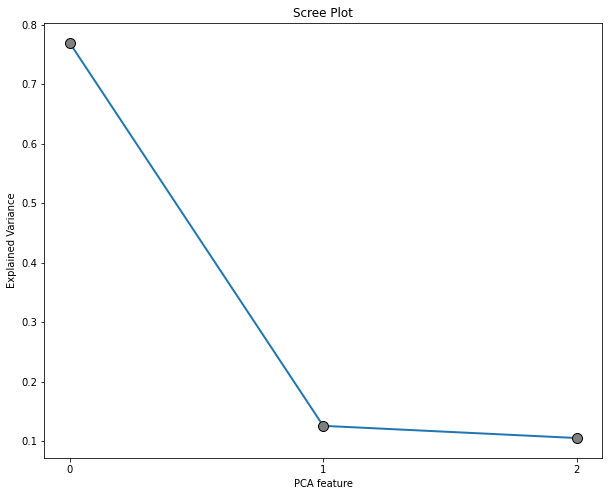

In [31]:
# Building Hult PCA: 
# Instantiating a PCA object:
hult_pca = PCA(n_components = None,
                   random_state = 802)

# Fitting and transforming:
survey_hult_pca = hult_pca.fit_transform(X_hult_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", X_hult_scaled.shape)
print("PCA shape     :",  survey_ocean_pca.shape)

# calling the scree_plot function
scree_plot(pca_object = hult_pca)

<h3> Evaluating Hult DNA PCA Algorithms </h3>

In [32]:
# Evaluating Hult DNA PCA Algorithms
# component number counter
component_number = 0

# looping over each principal component
for variance in hult_pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.769
PC 2 : 0.126
PC 3 : 0.105


In [33]:
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(hult_pca.components_))

# naming rows as original features
factor_loadings = factor_loadings.set_index(survey_hult_scaled.columns)

# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}

""")

# # checking the result
# factor_loadings_new

# analyzing factor strengths per customer
X_pca_reduced = hult_pca.transform(survey_hult_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# checking the results
X_pca_df

pd.np.var(X_pca_df)


MAX Components Factor Loadings
------------------------------
                  0     1     2
Communicating -0.58  0.48  0.66
Team building -0.57 -0.82  0.09
Thinking      -0.58  0.32 -0.75




<ipython-input-33-72f735f80ea3>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(hult_pca.components_))
<ipython-input-33-72f735f80ea3>:29: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.var(X_pca_df)


0    2.308452
1    0.376542
2    0.315006
dtype: float64

<h4> Naming the components for Hult DNA </h4><br>
The first component Beginners, isn't strongly related to any one Personality or trait.It seems that it shows all negative variances but among them neuroticism is a great fit for this persona since Beginners is unpredictable.The second component TeamPlayers is strongly related to openness. TeamPlayers is an easy choice for this persona and highly openness and shows negative variance in agreeableness.The third component Growth Mindset is high negatively correlated to neuroticism and compartively high in openness. 

In [34]:
factor_loadings_new.columns = ['Beginners',
                               'TeamPlayers',
                               'GrowthMindset']

factor_loadings_new

,Beginners,TeamPlayers,GrowthMindset
Openness,-0.513903,0.087560,0.372198
Conscientousness,-0.452306,0.636739,0.029483
Extraversion,-0.392885,-0.757972,-0.017256
Agreeableness,-0.546146,-0.094557,0.110765
Neuroticism,-0.280516,0.058605,-0.920887


In [35]:
# Converting Hult DNA Data to Factors
hult_dna = hult_pca.transform(survey_hult_scaled)

hult_dna_df = pd.DataFrame(hult_dna)

hult_dna_df.columns = factor_loadings_new.columns

hult_dna_df.head(n=5)

,Beginners,TeamPlayers,GrowthMindset
0,-0.059400,-0.226345,-0.141629
1,-0.676179,-0.514956,0.389710
2,1.582534,-0.190519,-0.023301
3,-0.647223,0.276090,0.710205
4,2.620435,0.627683,-0.133962


# Analysis

In [36]:
# Concatenating Data to Standardize and Cluster
factorized_survey = pd.concat([ocean_df,hult_dna_df],axis=1)

In [37]:
# Standardizing Factorized Data

# scaling the data
scaler_factorized = StandardScaler()

scaler_factorized.fit(factorized_survey)
factorized_scaled = scaler_factorized.transform(factorized_survey)
factorized_scaled_df = pd.DataFrame(factorized_scaled) 
factorized_scaled_df.columns = factorized_survey.columns

# checking pre- and post-scaling variance
print(pd.np.var(factorized_survey), '\n\n')
print(pd.np.var(factorized_scaled_df))

Shy              2.165009
Uproared         0.952070
Balanced         0.935609
Beginners        2.308452
TeamPlayers      0.376542
GrowthMindset    0.315006
dtype: float64 


Shy              1.0
Uproared         1.0
Balanced         1.0
Beginners        1.0
TeamPlayers      1.0
GrowthMindset    1.0
dtype: float64


<ipython-input-37-550ed129d8b6>:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(factorized_survey), '\n\n')
<ipython-input-37-550ed129d8b6>:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(factorized_scaled_df))


<h4> Dendrogram and Inertia Plot </h4><br>

To help us understand the clusters creation 

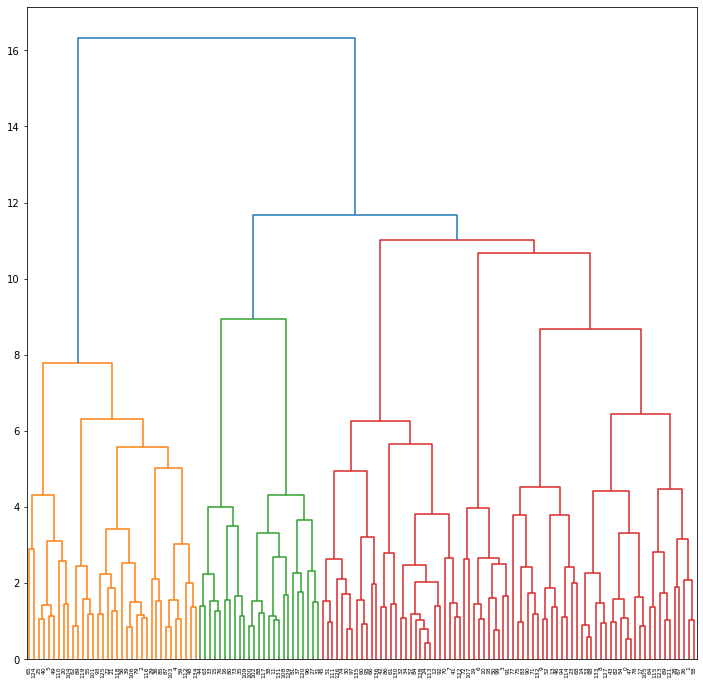

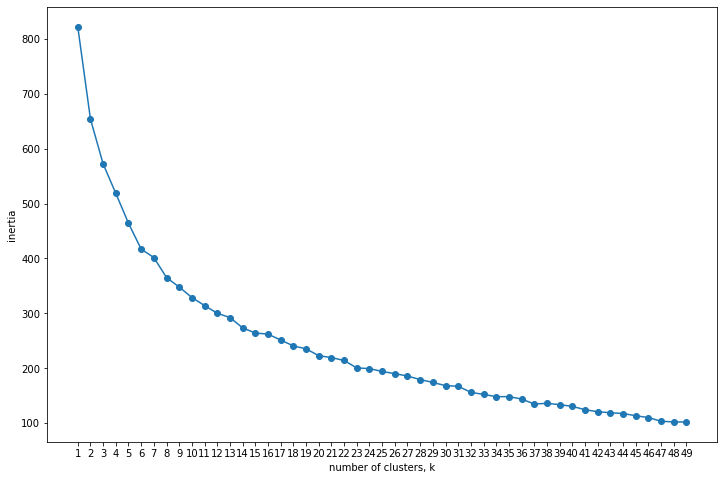

In [38]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = factorized_scaled_df,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('survey_clust_ward.png')
plt.show()

#Running Intertia Plot

inertia_plot(data = factorized_scaled_df)

We can see three clearly bifurcated clusters from the above dendeogram and also by interia plot we can see the optimum number of clusters.

<h4> K-Means Model </h4><br>

In [39]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters = 3,
                        random_state = 802)


# fitting the object to the data
customers_k_pca.fit(factorized_scaled_df)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)

#Renaming columns for centroids
centroids_pca_df.columns = factorized_scaled_df.columns

# checking results (clusters = rows, pc = columns)
print(centroids_pca_df.round(2))

# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                          factorized_scaled_df],
                          axis = 1)
clst_pca_df.head(n=5)

1    53
2    43
0    41
Name: Cluster, dtype: int64
    Shy  Uproared  Balanced  Beginners  TeamPlayers  GrowthMindset
0 -0.06      0.85      0.40      -0.28        -0.27          -0.75
1  0.88     -0.30     -0.16       0.83        -0.17           0.41
2 -1.03     -0.45     -0.18      -0.75         0.46           0.21


,Cluster,Shy,Uproared,Balanced,Beginners,TeamPlayers,GrowthMindset
0,0,-0.092914,0.595573,0.110863,-0.039096,-0.368863,-0.252343
1,0,-0.329940,1.651176,0.888235,-0.445042,-0.839196,0.694355
2,1,0.385909,-0.027846,-1.496150,1.041580,-0.310478,-0.041517
3,2,-0.242184,-0.803420,0.926379,-0.425984,0.449929,1.265390
4,1,1.144196,-0.801557,0.386900,1.724697,1.022900,-0.238683


In [40]:
final_pca_clust_df = pd.concat([clst_pca_df, survey_cate], axis = 1)
final_pca_clust_df.head(n=5)

,Cluster,Shy,Uproared,Balanced,Beginners,TeamPlayers,GrowthMindset,surveyID,current_laptop,next_laptop,program,age,gender,nationality,ethnicity,age_category
0,0,-0.092914,0.595573,0.110863,-0.039096,-0.368863,-0.252343,10000,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,25-30
1,0,-0.329940,1.651176,0.888235,-0.445042,-0.839196,0.694355,10001,Windows laptop,Windows laptop,One year Business Analytics,27,Male,ecuador,Hispanic / Latino,25-30
2,1,0.385909,-0.027846,-1.496150,1.041580,-0.310478,-0.041517,10002,Windows laptop,Windows laptop,One year Business Analytics,25,Male,indian,West Asian / Indian,25-30
3,2,-0.242184,-0.803420,0.926379,-0.425984,0.449929,1.265390,10003,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,25-30
4,1,1.144196,-0.801557,0.386900,1.724697,1.022900,-0.238683,10004,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,china,Far east Asian,25-30


In [41]:
# create a pivot table for current_laptop with age_category
pd.pivot_table(final_pca_clust_df, 
               index = ['current_laptop',
                        'gender'],
               values = ["surveyID"],
               aggfunc = len)

surveyID
current_laptop gender          
Macbook        Female        36
               Male          33
Windows laptop Female        23
               Male          45

In [42]:
# create a pivot table for current_laptop with age_category
pd.pivot_table(final_pca_clust_df, 
               index = ['current_laptop',
                        'age_category'],
               values = ["surveyID"],
               aggfunc = len)

surveyID
current_laptop age_category          
Macbook        25-30               23
               < 25                36
               >=30                10
Windows laptop 25-30               42
               < 25                 9
               >=30                17

In [43]:
# create a pivot table for current_laptop with ethnicity
pd.pivot_table(final_pca_clust_df, 
               index = ['current_laptop',
                        'ethnicity'],
               values = ["surveyID"],
               aggfunc = len)

surveyID
current_laptop ethnicity                     
Macbook        African American             5
               Far east Asian              17
               Hispanic / Latino            6
               Middle Eastern               1
               Native American              1
               Prefer not to answer         5
               West Asian / Indian         10
               White / Caucasian           24
Windows laptop African American             3
               Far east Asian              12
               Hispanic / Latino           19
               Middle Eastern               1
               Prefer not to answer         4
               West Asian / Indian         15
               White / Caucasian           14

In [44]:
# create a pivot table for current_laptop with program
pd.pivot_table(final_pca_clust_df, 
               index = ['current_laptop',
                        'program'],
               values = ["surveyID"],
               aggfunc = len)

surveyID
current_laptop program                                   
Macbook        DD (MBA & Business Analytics)           12
               DD (MBA & Disruptive innovation)         1
               DD (MIB & Business Analytics)           41
               One year Business Analytics             15
Windows laptop DD (MBA & Business Analytics)           22
               DD (MIB & Business Analytics)           25
               One year Business Analytics             21

<h4> Graphical Analysis </h4><br>

<AxesSubplot:xlabel='current_laptop', ylabel='GrowthMindset'>

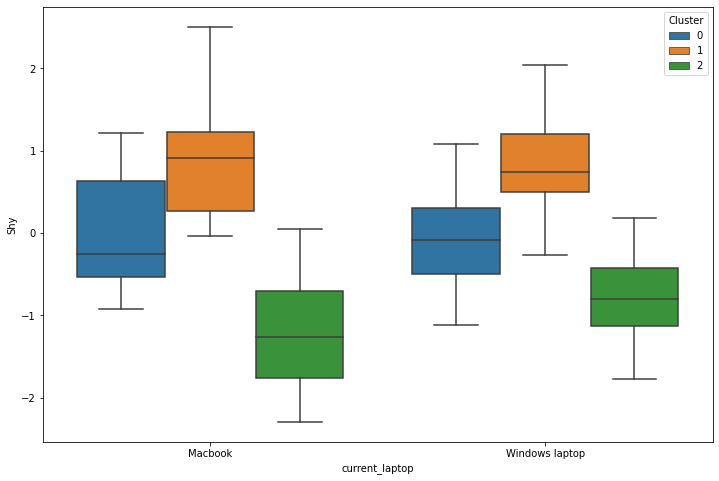

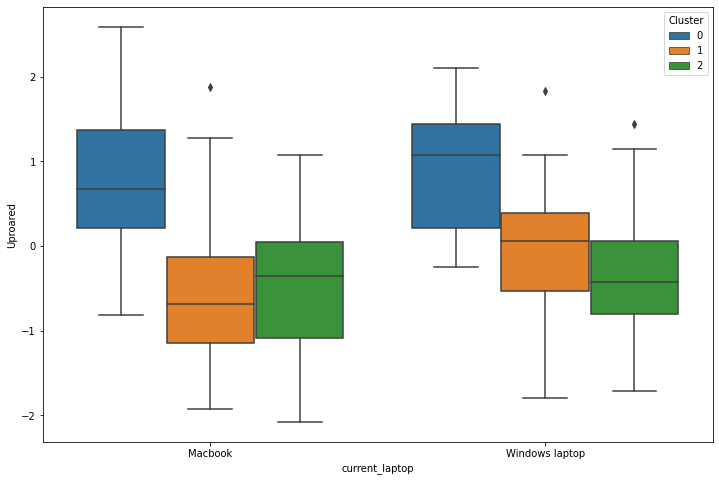

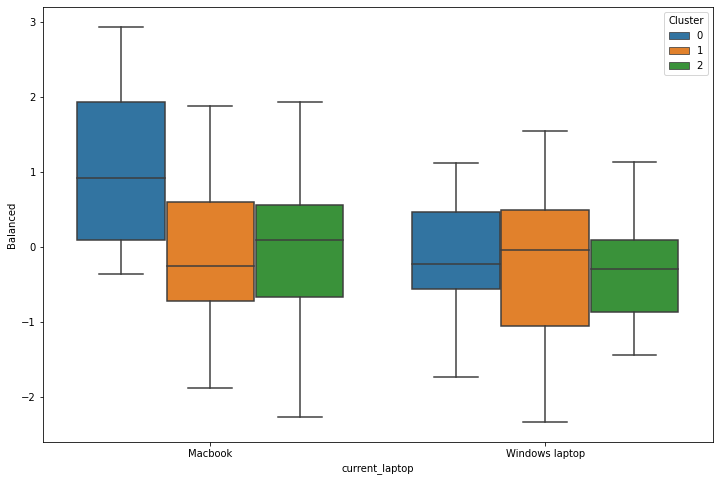

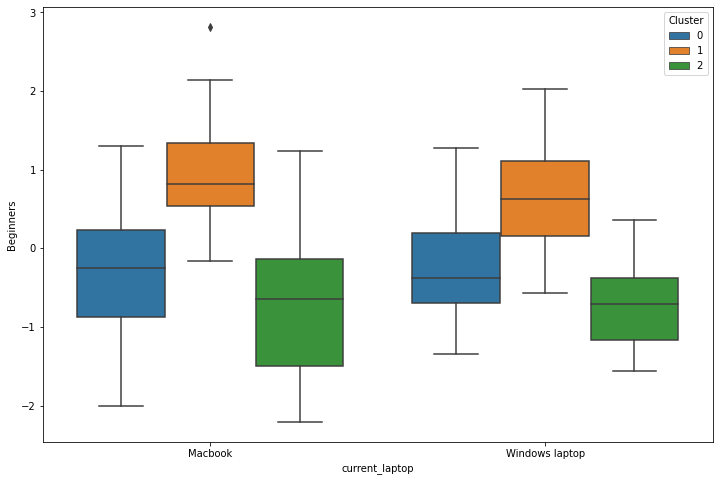

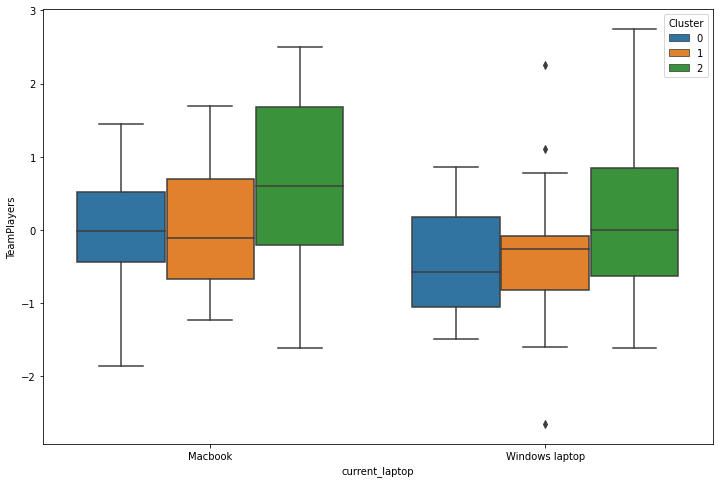

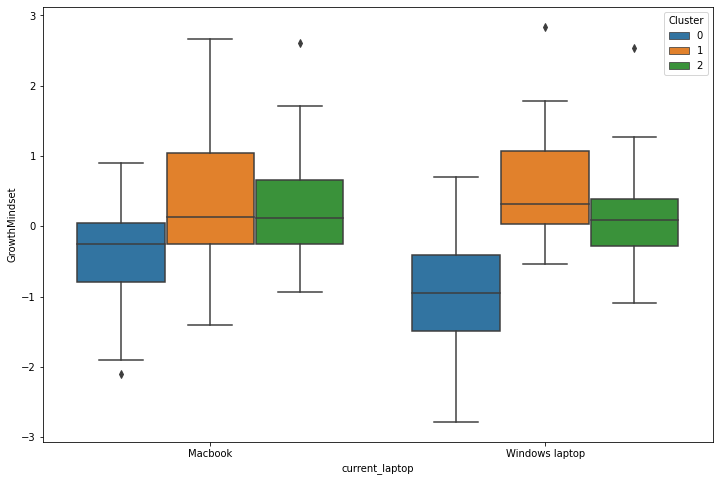

In [45]:
# Cluster plot for current_laptop

# Component_shy
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'current_laptop',
           y = 'Shy',
           hue = 'Cluster',
           data = final_pca_clust_df)

# Component_Uproared
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'current_laptop',
           y = 'Uproared',
           hue = 'Cluster',
           data = final_pca_clust_df)

# Component_Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'current_laptop',
           y = 'Balanced',
           hue = 'Cluster',
           data = final_pca_clust_df)


# Component_Beginners
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'current_laptop',
           y = 'Beginners',
           hue = 'Cluster',
           data = final_pca_clust_df)

# Component_TeamPlayers
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'current_laptop',
           y = 'TeamPlayers',
           hue = 'Cluster',
           data = final_pca_clust_df)

# Component_GrowthMindset
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'current_laptop',
           y = 'GrowthMindset',
           hue = 'Cluster',
           data = final_pca_clust_df)


<AxesSubplot:xlabel='next_laptop', ylabel='GrowthMindset'>

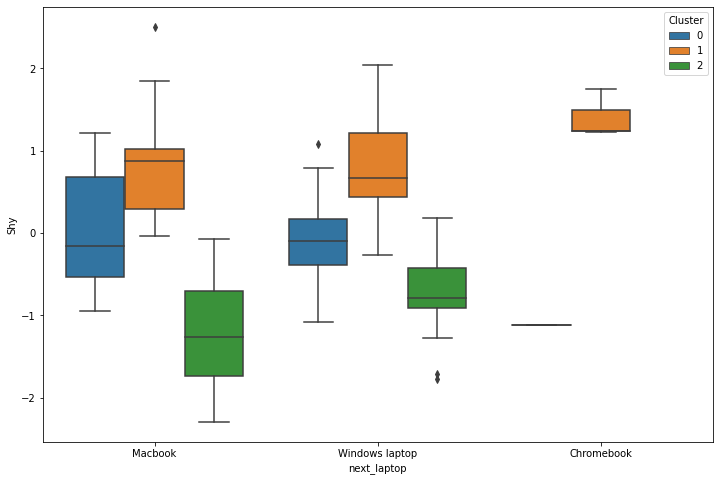

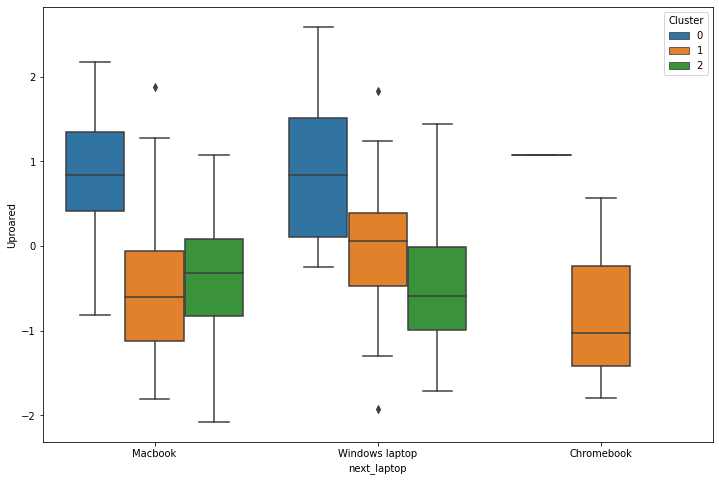

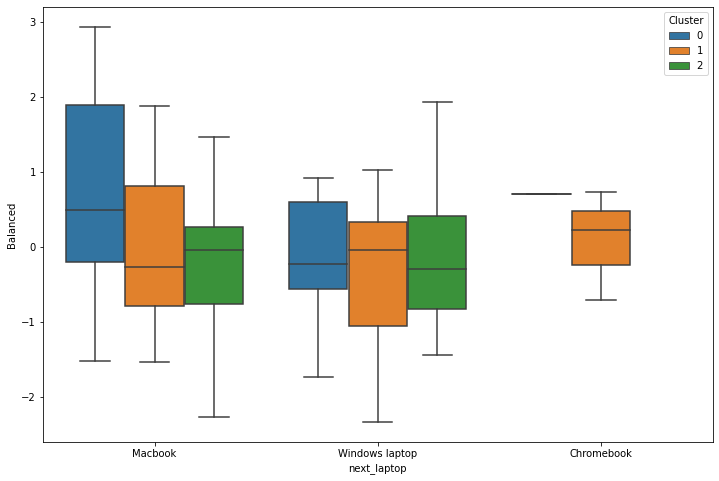

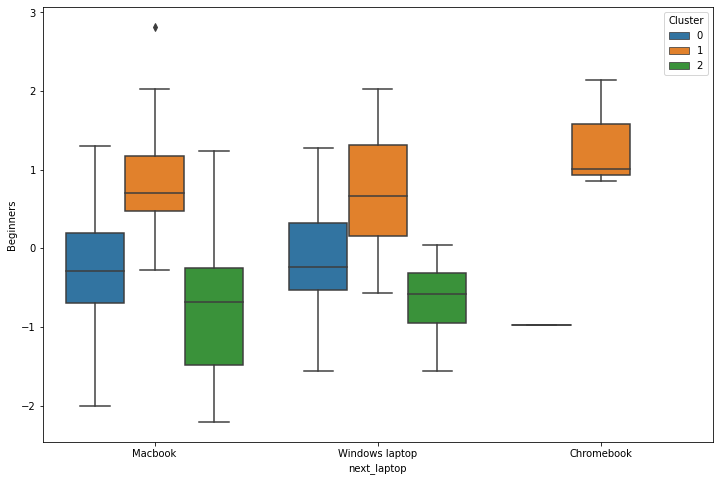

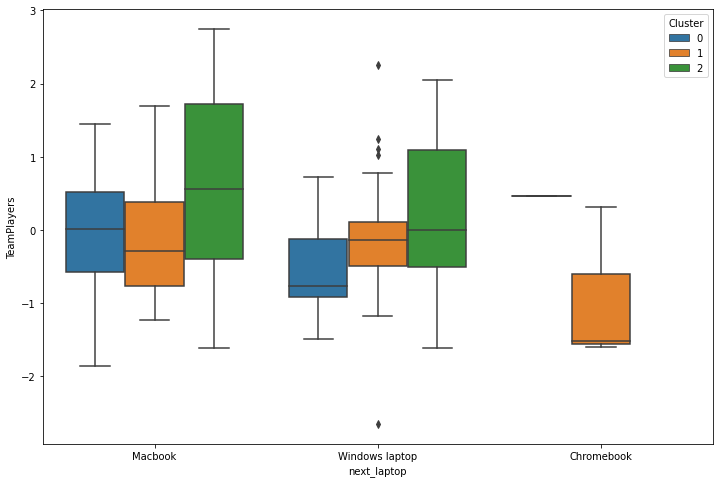

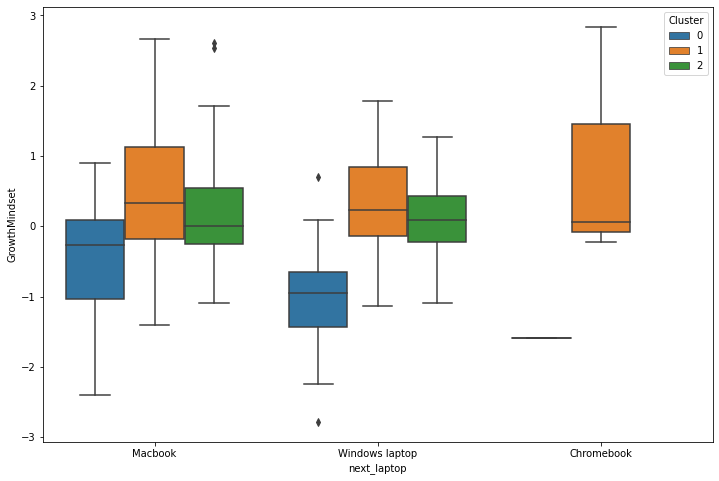

In [46]:
# Cluster plot for next_laptop

# Component_shy
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'next_laptop',
           y = 'Shy',
           hue = 'Cluster',
           data = final_pca_clust_df)

# Component_Uproared
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'next_laptop',
           y = 'Uproared',
           hue = 'Cluster',
           data = final_pca_clust_df)

# Component_Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'next_laptop',
           y = 'Balanced',
           hue = 'Cluster',
           data = final_pca_clust_df)


# Component_Beginners
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'next_laptop',
           y = 'Beginners',
           hue = 'Cluster',
           data = final_pca_clust_df)

# Component_TeamPlayers
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'next_laptop',
           y = 'TeamPlayers',
           hue = 'Cluster',
           data = final_pca_clust_df)

# Component_GrowthMindset
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'next_laptop',
           y = 'GrowthMindset',
           hue = 'Cluster',
           data = final_pca_clust_df)

###### Insight 1

Based on our findings, the age group that prefers Apple over Windows are Gen Z, meaning people that are below 25 years of age. Meanwhile Millennials and older generations tend to prefer a Windows laptop. This comes to no surprise since Gen Z have grown up with technology at their fingertips. Furthermore, Gen Z tend to be more brand driven and see Apple as a status symbol. Since majority of Gen Z is a popular demographic that owns at least one Apple product they are more likely buy a Mac due to familiarity and brand loyalty.

###### Insight 2 

Based on our findings, the program that prefers Mac over Windows is DD (MIB & Business Analytics) .  Although Macs tend to be more expensive, students probably assumed that they needed a reliable system that would be able to sustain both programs.  Macs can boost much faster, are stable and encounter fewer issues which is especially crucial while doing the business analytics program. Furthermore, even if students need a windows operating system they can easily run windows inside of a virtual box. Students can get the features of windows, while being rest assured by the user friendly and durability of a Mac. As stated earlier, Macs are more expensive, but it is worth the investment for students who will need a reliable system for coding platforms and general courses.

###### Insight 3 

Based on the analysis we performed from the survey data, it clearly shows there is a higher usage of Mac compared to Windows. From the results we got based on the nationalities, we can see that 91% of people from different nationalities use Mac as their current laptop. Among them, Caucasian and Latino shows the high percentage of Mac users. When it comes to a Windows laptop usage, Middle eastern users show a significantly less percentage.


###### Insight 4

Based on our data exploration from our survey results, shows highest number of Mac users among 137 total respondents. we divided the data into 3 clusters cluster 0, 1 and 2 and rated them with compentents such as 
shy, Uproared and Balanced. cluster 0 indicates shy  they dont engage and need to grow their mindset and by the above analysis it shows clearly high usage of Macbook than the windows.

###### Recommendation

A large majority of young people tend to prefer Mac over Windows. This is due to brand name, sleekness, and durability of the Mac. Therefore, Mac should consider focusing on the Gen Z age range, especially since this generation makes up a large population of students. Focusing on this demographic, would help to increase overall customer retention.
However, there is still a gap in consumers who would buy Windows. If Apple can get a hold of this untapped niche of consumers and gain their loyalty, Apple could gain a significant advantage within the market. One reason that Windows has an advantage is cost; a Windows laptop is hundreds of dollars cheaper than a Mac. In fact, in a recent survey if cost was not a consideration, 71% of college students preferred a Mac over a PC (Thubron, 2019). Another reason to consider why consumers would prefer a Windows laptop is for gaming purposes.  Computer games require a lot of space and are not compatible with the Mac operating system. Since Apple produces premium products and consumers are so brand loyal the likelihood of dropping the price is not likely to happen in the future. However, Apple should consider to delivering a more customizable product fitted specifically for gaming purposes. The gaming industry is huge and catering to additional audiences will create more loyal customers.


###### Reference 

Thubron, Rob. “71% Of Students Own or Would Prefer a Mac, Claims Survey.” TechSpot, TechSpot, 24 May 2019, www.techspot.com/news/80220-71-students-own-or-would-prefer-mac-claims.html.